### Bivariate Analysis

Question: What was the relationship between Funding received and Funding requirements across by year?

Import Dependency

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

In [44]:
df.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


Covert "Value" column from string to numeric data, to ensure "Value" column only contains numeric data.

In [45]:
df['Value'] = df['Value'].replace(',', '', regex=True)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Filter Metric in Funding received and Funding requirements Since we only interest both Funding received and Funding requirements Metric.

In [46]:
df_filtered = df[df['Metric'].isin(['Funding received', 'Funding requirements'])]

Group and sum up the value of Funding received and Funding requirements value by years

In [47]:
yearly_funding = df_filtered.groupby(['Year', 'Metric'])['Value'].sum().reset_index()
pd.set_option('display.float_format', '{:,.0f}'.format)

Structure a new data farm object with columns 'year', 'Funding received', and 'Funding requirements'

In [48]:
yearly_received = yearly_funding[yearly_funding['Metric'] == 'Funding received'].rename(columns={'Value': 'Funding received'})
yearly_requirements = yearly_funding[yearly_funding['Metric'] == 'Funding requirements'].rename(columns={'Value': 'Funding requirements'})

yearly_merge = pd.merge(yearly_received, yearly_requirements, how='outer', on=['Year'])
yearly_merge.drop(columns=['Metric_x', 'Metric_y'], inplace=True)

yearly_merge

,Year,Funding received,Funding requirements
0,2010,"5,085,448,219",9607304247
1,2011,"1,443,996,575",4893040499
2,2012,"4,424,167,634",11263027389
3,2013,"4,712,463,654",10348530114
4,2014,"3,878,980,348",9923708780
5,2015,"8,550,240,023",14584807503
6,2016,"5,678,913,327",10327887945
7,2017,"9,111,000,599",19980547400
8,2018,"21,922,679,445",44655342517
9,2019,"25,355,421,122",57310206372


Drop off the NaN data from Funding received.

Reason: I think the NaN values are caused by missing data for the received funding. There should be a data anomaly; otherwise, it's very unlikely that the received funding is actually zero.

In [49]:
yearly_merge = yearly_merge.dropna(subset=['Funding received'])
yearly_merge

,Year,Funding received,Funding requirements
0,2010,"5,085,448,219",9607304247
1,2011,"1,443,996,575",4893040499
2,2012,"4,424,167,634",11263027389
3,2013,"4,712,463,654",10348530114
4,2014,"3,878,980,348",9923708780
5,2015,"8,550,240,023",14584807503
6,2016,"5,678,913,327",10327887945
7,2017,"9,111,000,599",19980547400
8,2018,"21,922,679,445",44655342517
9,2019,"25,355,421,122",57310206372


Generate scatter plot between Funding received and Funding requirements

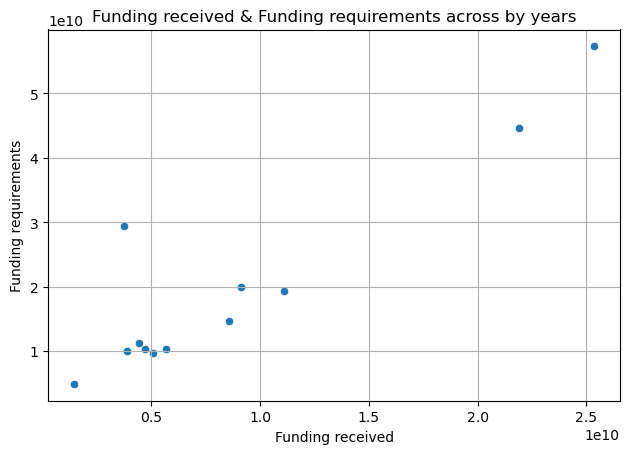

In [50]:
sns.scatterplot(data = yearly_merge, x = yearly_merge['Funding received'], y = yearly_merge['Funding requirements'])
plt.xlabel('Funding received')
plt.ylabel('Funding requirements')
plt.title('Funding received & Funding requirements across by years')
plt.grid(True)
plt.tight_layout()
plt.show()

Find the correlation coefficient between Funding received and Funding requirements

In [51]:
print(
    'The correlation coefficient:', 
    yearly_merge['Funding received'].corr(yearly_merge['Funding requirements'], method='pearson')
)

The correlation coefficient: 0.911077741301193


### Analyze: 

The scatter plot reveals a strong linear relationship between funding requirements and funding received across years. As funding needs increase, the received funding tends to rise proportionally. This is supported by a Pearson correlation coefficient of approximately 0.911078, indicating a very strong positive correlation. Therefore, we can conclude that there is a consistently strong relationship between the level of funding requirements and the funding provided over time.

### Note!!!  -  However, this relationship analysis is biased because of the lack of received funding data from 2022 to 2024, which causes data anomalies and thus results in biased outcomes.


<hr>

### Univariate Analysis

Question: How have global humanitarian needs Funding Requirements and Funding Received evolved from 2010 to 2024? 

In [52]:
df = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

Covert "Value" column from string to numeric data, to ensure "Value" column only contains numeric data.

In [53]:
df['Value'] = df['Value'].replace(',', '', regex=True)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Filter Metric in Funding received and Funding requirements Since we only interest both Funding received and Funding requirements Metric.

In [54]:
df_filtered = df[df['Metric'].isin(['Funding received', 'Funding requirements'])]

Group and sum up the value of Funding received and Funding requirements value by years

In [55]:
yearly_funding = df_filtered.groupby(['Year', 'Metric'])['Value'].sum().reset_index()
yearly_funding

,Year,Metric,Value
0,2010,Funding received,5085448219
1,2010,Funding requirements,9607304247
2,2011,Funding received,1443996575
3,2011,Funding requirements,4893040499
4,2012,Funding received,4424167634
5,2012,Funding requirements,11263027389
6,2013,Funding received,4712463654
7,2013,Funding requirements,10348530114
8,2014,Funding received,3878980348
9,2014,Funding requirements,9923708780


Generate bar graph with Funding received and Funding requirements

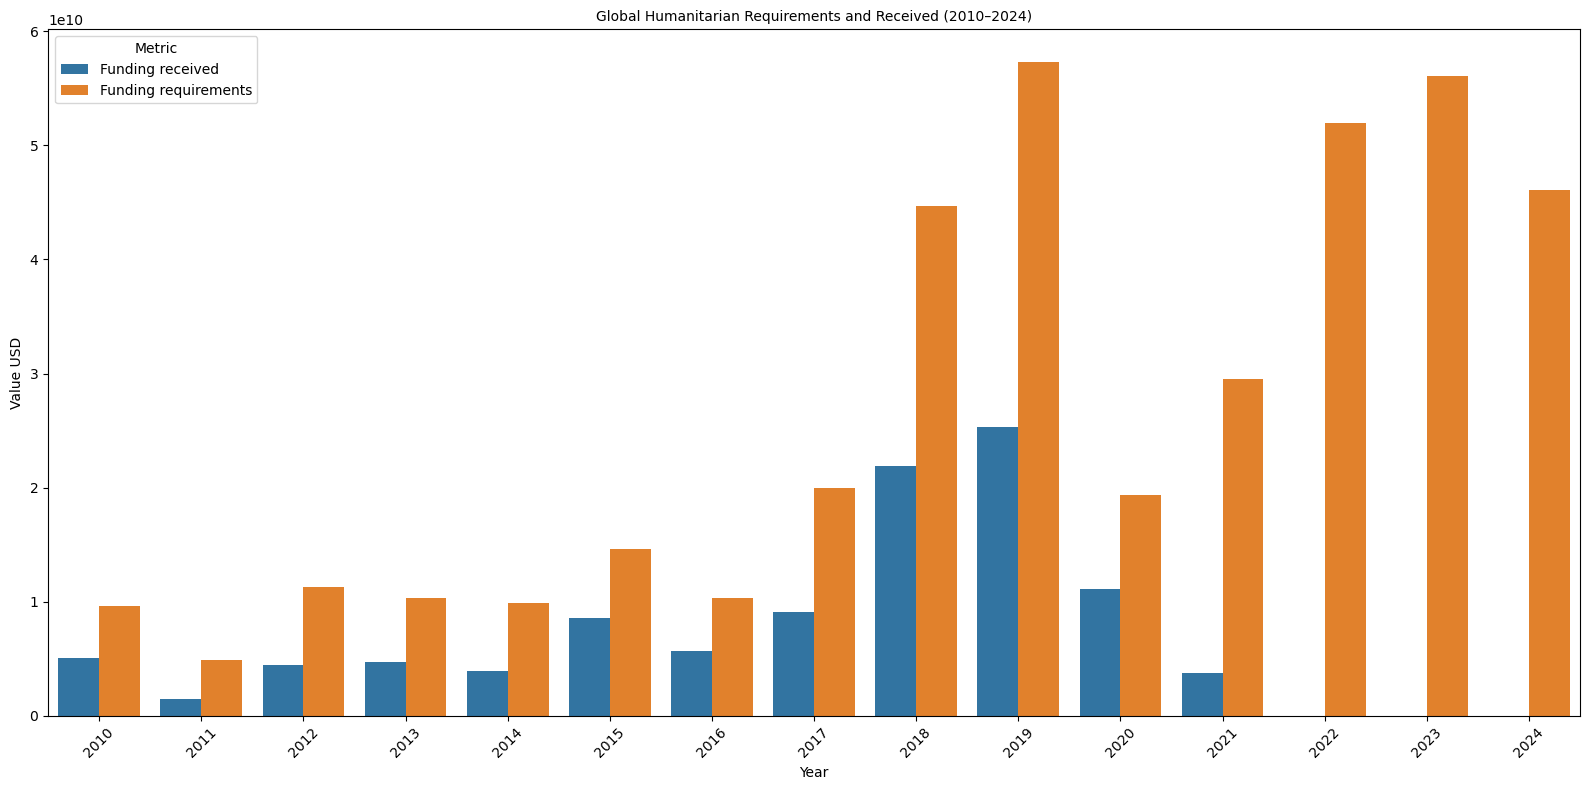

In [56]:
plt.figure(figsize=(16, 8))
sns.barplot(data=yearly_funding, x='Year', y='Value', hue='Metric')
plt.title('Global Humanitarian Requirements and Received (2010–2024)', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Value USD')
plt.legend(title='Metric', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# yearly_funding

### Analyze: 

Based on the histogram, we can see that global humanitarian funding requirements have been increasing over the years, especially from 2021 to 2024. The upward trend was most notable between 2017 and 2019, reaching the maximum value during this period. This may reflect the growing severity of global humanitarian crises.

Global humanitarian funding received has also been increasing, reaching the maximum value in 2019. However, the gap between requirements and received funding has been steadily widening. For example, in 2018, the gap was around 50%, whereas by 2019, it had exceeded 50%.